## Q1: Posterior Distribution of $\boldsymbol{\beta}$ in Linear Regression

We model the conditional distribution of the outcome as:

$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \Sigma = \sigma^2 \mathbf{I}) \propto
\exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

We assume a multivariate normal prior on \( \boldsymbol{\beta} \):

$$
\boldsymbol{\beta} \sim \mathcal{MVN}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_\beta)
$$



### Derivation

The posterior is proportional to the product of the likelihood and the prior:

$$
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2) \propto
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \cdot
p(\boldsymbol{\beta})
$$

Expanding both exponential terms:

$$
\propto \exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
\cdot
\exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

### Expand the Quadratic Terms

\begin{align*}
(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})
&= \mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} \\
(\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)
&= \boldsymbol{\beta}^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}
- 2 \boldsymbol{\beta}^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0
+ \boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0
\end{align*}


### Combine and Simplify

$$
\log p(\boldsymbol{\beta} \mid \cdot) \propto
-\frac{1}{2} \left[
\boldsymbol{\beta}^\top \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right) \boldsymbol{\beta}
- 2 \boldsymbol{\beta}^\top \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right)
\right]
$$


### Posterior Distribution:

$$
\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2 \sim
\mathcal{MVN}(\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n)
$$

\begin{align*}
\boldsymbol{\Sigma}_n &= \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1} \\
\boldsymbol{\mu}_n &= \boldsymbol{\Sigma}_n \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right)
\end{align*}

---

## Q1(b): Posterior Distribution of $\sigma^2$

We consider the following model components:

- **Likelihood**:  
$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto
(\sigma^2)^{-n/2} \exp\left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) \right)
$$

- **Prior for variance**:  
$$
\sigma^2 \sim \text{Inv-Gamma}(\alpha^*, \beta^*) \quad \Rightarrow \quad
p(\sigma^2) \propto (\sigma^2)^{-(\alpha^* + 1)} \exp\left( -\frac{\beta^*}{\sigma^2} \right)
$$

---

### Posterior Derivation

Using Bayes' rule, the posterior distribution of $\sigma^2$
given $$(\mathbf{y}, \mathbf{X}, \boldsymbol{\beta})$$ is proportional to the product of the likelihood and prior:

$$
\begin{aligned}
p(\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta})
&\propto p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \cdot p(\sigma^2) \\
&\propto (\sigma^2)^{-n/2} \exp\left( -\frac{1}{2\sigma^2} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|^2 \right) \cdot
(\sigma^2)^{-(\alpha^* + 1)} \exp\left( -\frac{\beta^*}{\sigma^2} \right)
\end{aligned}
$$

Combining terms:

$$
p(\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto
(\sigma^2)^{-(\alpha^* + \frac{n}{2} + 1)} \exp\left(
-\frac{1}{\sigma^2} \left[ \beta^* + \frac{1}{2} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|^2 \right]
\right)
$$


### Posterior Result

This is the kernel of an inverse-gamma distribution, so the posterior is:

$$
\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta} \sim
\text{Inv-Gamma}(\alpha_n, \beta_n)
$$

With updated parameters:

$$
\begin{aligned}
\alpha_n &= \alpha^* + \frac{n}{2} \\
\beta_n &= \beta^* + \frac{1}{2} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|^2
\end{aligned}
$$


Combining prior and likelihood:

$$
p(\sigma^2 \mid \mathbf{y}, \boldsymbol{\beta}) \propto
(\sigma^2)^{-(\alpha_0 + \frac{n}{2} + 1)} \exp\left(
-\frac{1}{\sigma^2} \left[ \beta_0 + \frac{1}{2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2 \right]
\right)
$$

### Posterior Distribution:

$$
\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta} \sim
\text{Inv-Gamma} \left(
\alpha_0 + \frac{n}{2},\;
\beta_0 + \frac{1}{2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2
\right)
$$



Output()

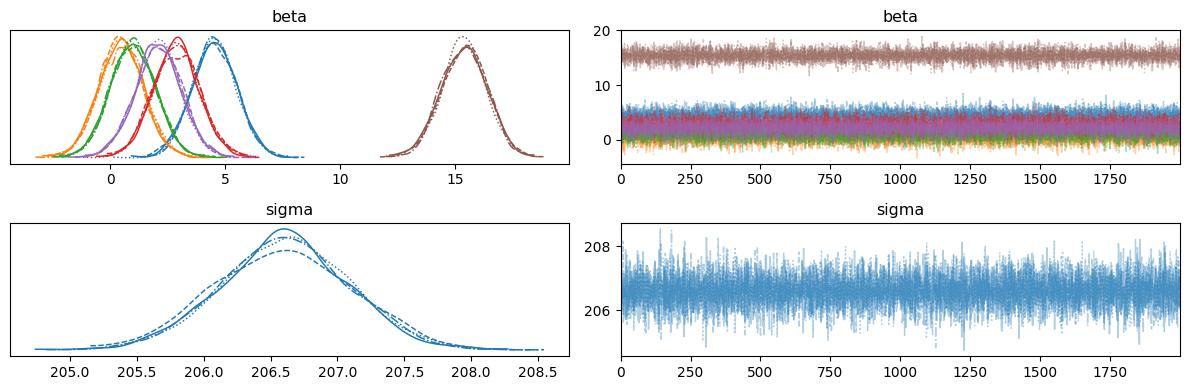

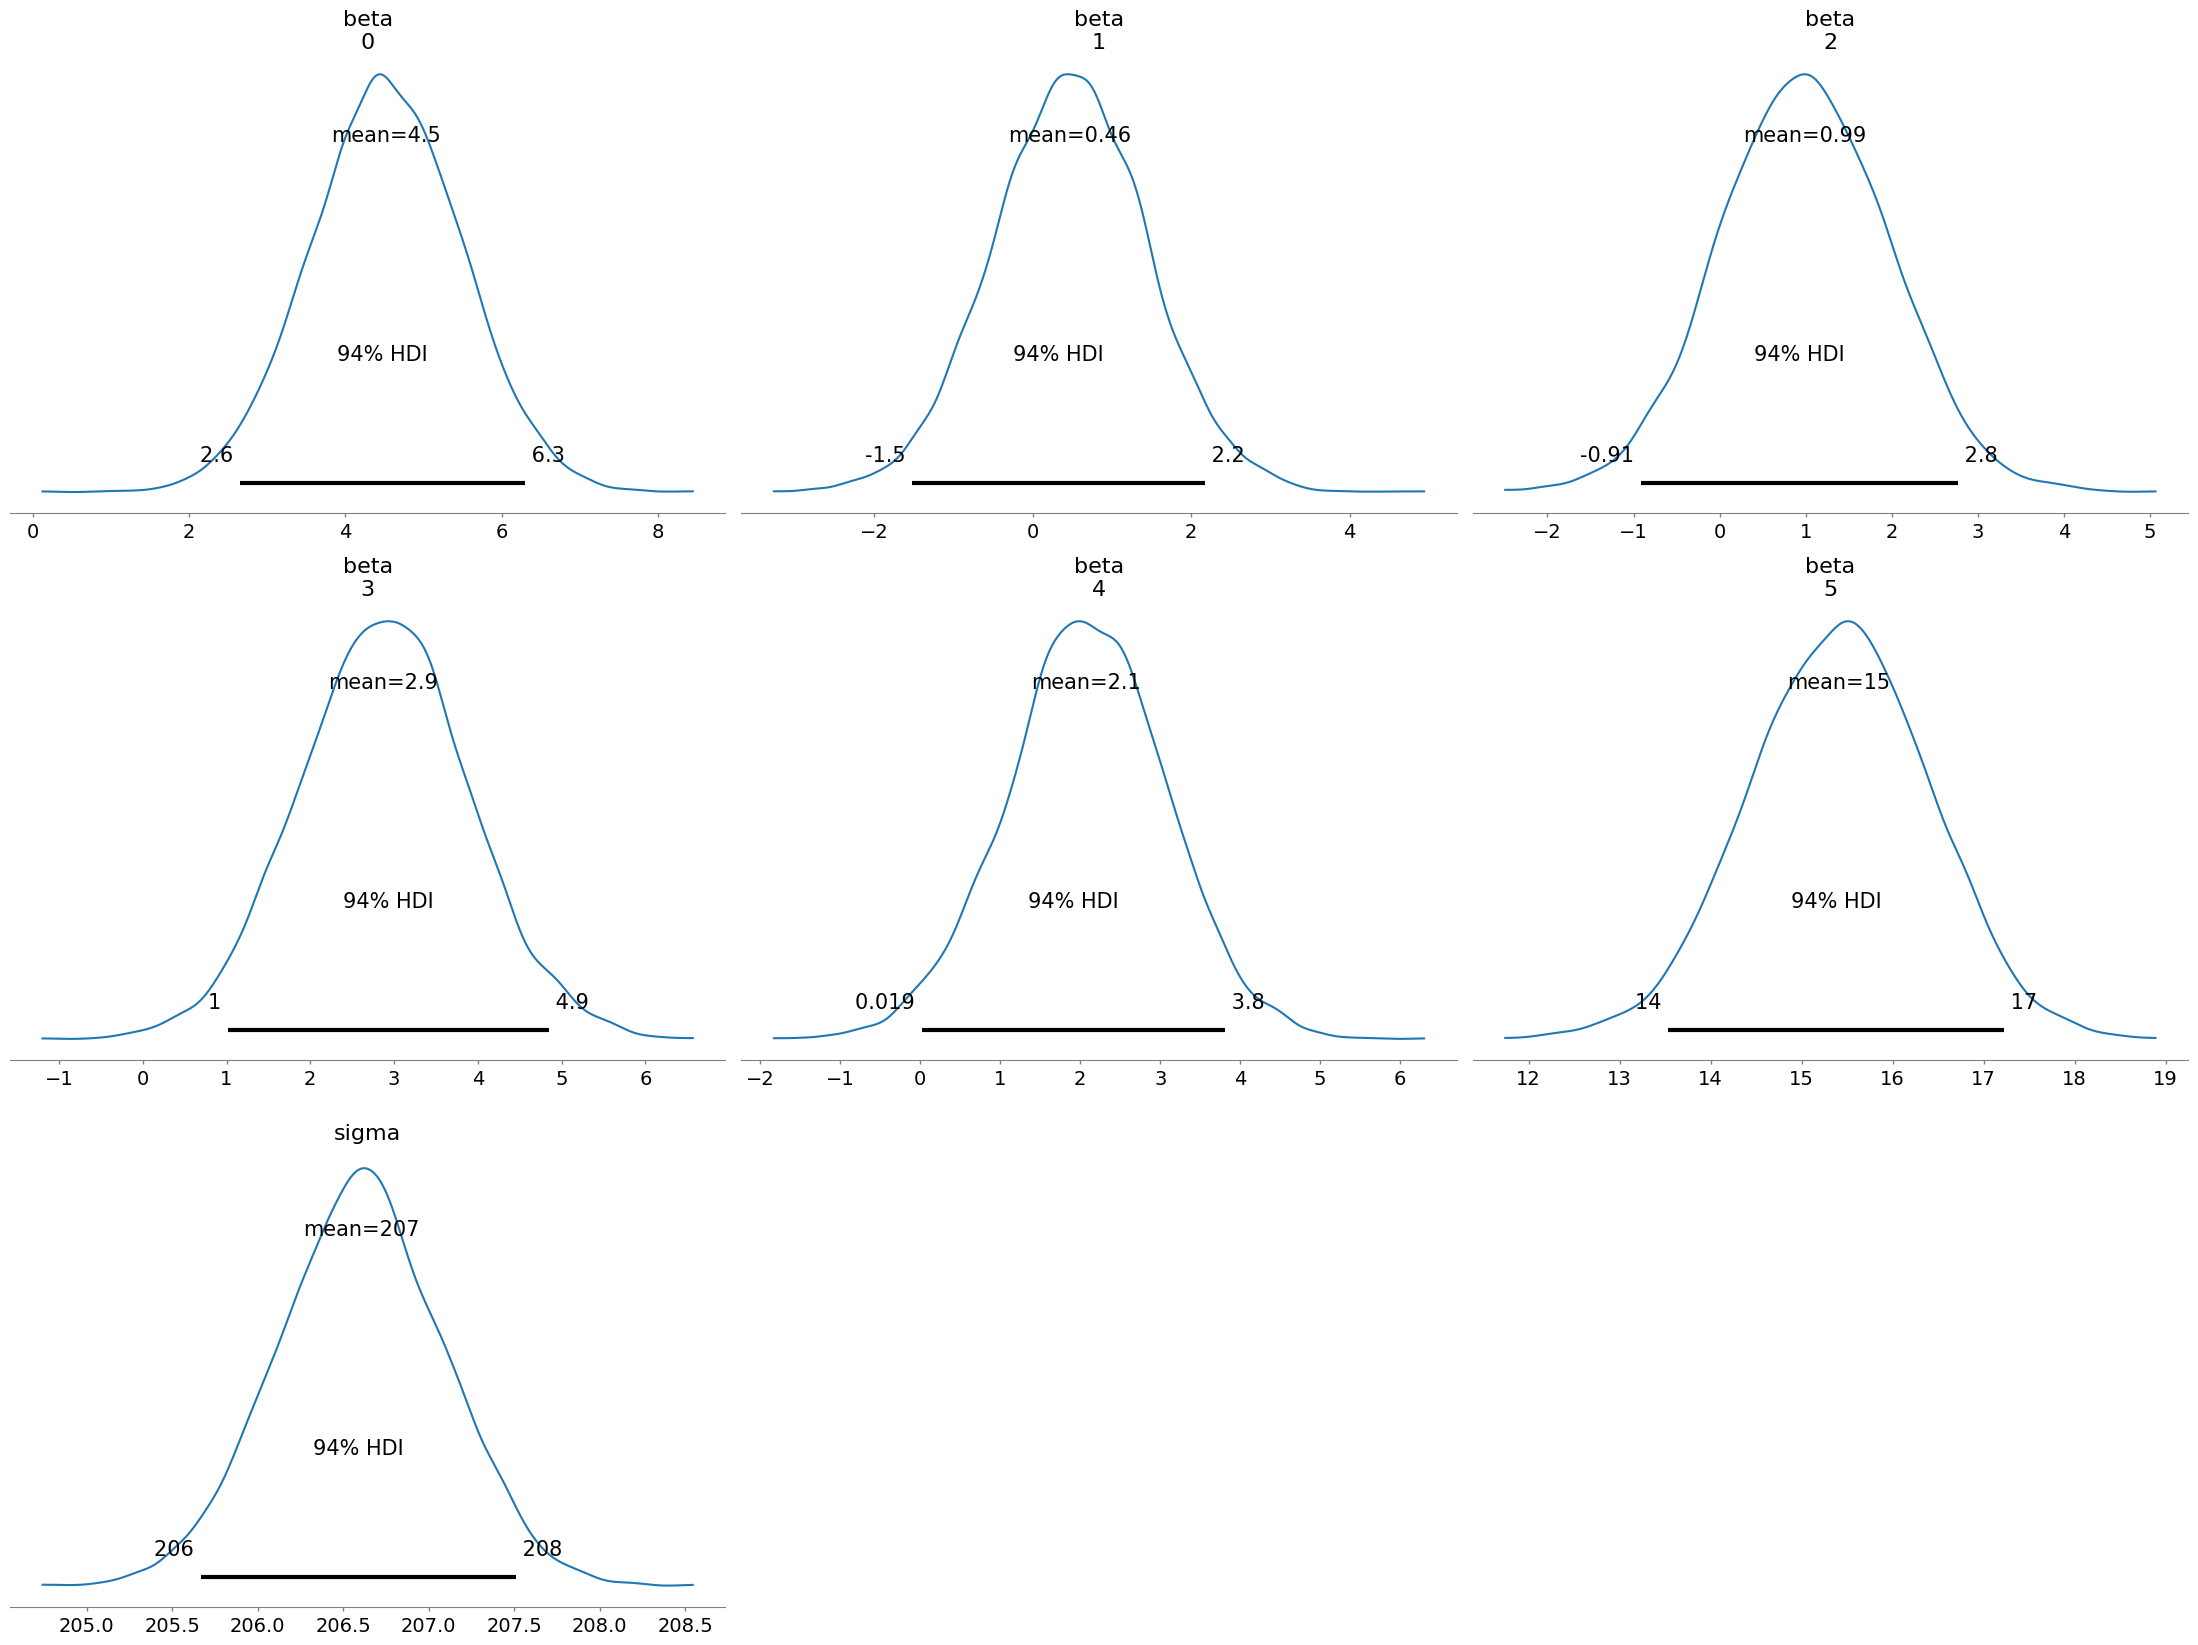

In [2]:
# QUESTION 2
import pandas as pd
import numpy as np
import pymc as pm
import pytensor.tensor as at
import arviz as az
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("climate_cocoa.csv", parse_dates=["Month"])

# predictor and target variables selected
predictors = [
    "HotDays_Lag1", "RainyDays_Lag1", "AvgTemp_Lag1",
    "TotalRain_Lag1", "TempRange_Lag1"
]
target = "AvgPrice"

# data cleaning
df = df.dropna(subset=predictors + [target])
X = df[predictors]
y = df[target]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=predictors)
X_scaled["Intercept"] = 1.0

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


with pm.Model() as cocoa_model:
    X_data = pm.Data("X_data", X_train.values)
    y_data = pm.Data("y_data", y_train.values)

    sigma = pm.HalfNormal("sigma", sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_train.shape[1])

    mu = at.dot(X_data, beta)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_data)

    trace = pm.sample(2000, tune=1000, chains=4, target_accept=0.9, return_inferencedata=True)

# --- DIAGNOSTICS ---
az.summary(trace)
az.plot_trace(trace)
plt.tight_layout()
plt.show()

az.plot_posterior(trace)
plt.tight_layout()
plt.show()


## Dataset Description

The dataset used in this analysis, `climate_cocoa.csv`, is the result of merging two original monthly time series:

1. **Cocoa Price Data**  
   - **Source**: International Cocoa Organization (ICCO)  
   - **Frequency**: Daily prices aggregated into monthly averages  
   - **Variable**: `AvgPrice` (average cocoa price in USD per tonne)

2. **Ghana Climate Data**  
   - **Source**: Meteorological station data from Ghana  
   - **Frequency**: Daily weather observations aggregated to monthly values  
   - **Variables**:  
     - Temperature stats: `AvgTemp`, `MaxTemp`, `MinTemp`  
     - Rainfall: `TotalRainfall`  
     - Derived climate counts: `HotDays`, `RainyDays`, `DryDays`, `TempRange`  
     - Lag features: `AvgTemp_Lag1`, `RainyDays_Lag1`, `TotalRain_Lag1`, etc.

---

### Dataset Construction

- Daily records from both climate and price datasets were converted to a common monthly time resolution using aggregation functions like `mean()` and `sum()`.
- Cocoa prices were grouped by month to form the variable `AvgPrice`.
- Climate variables were engineered to include **lagged features** to capture delayed effects.
- Both datasets were merged using the common `Month` column.


This merged dataset allows us to explore how past and present **Ghanaian climate indicators** affect **cocoa prices**. In the Bayesian linear regression model:

- Predictors come from the climate data (e.g., `HotDays_Lag1`, `AvgTemp_Lag1`, `TotalRain_Lag1`)
- Target variable \( y \) is the cocoa price: `AvgPrice`

This setup enables us to study time-lagged climatic influences on a real-world economic outcome using Bayesian techniques.




Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  13.073  10.187  -4.903   32.251      0.215    0.208    2248.0   
beta[1]   3.359  10.028 -17.244   20.276      0.231    0.275    1864.0   
beta[2]   0.236   9.756 -16.998   19.475      0.190    0.266    2635.0   
beta[3]   0.507   9.794 -17.827   18.172      0.208    0.212    2234.0   
beta[4]   2.095  10.247 -18.618   19.942      0.192    0.253    2824.0   
beta[5]   1.017  10.141 -18.908   19.640      0.212    0.257    2283.0   
nu       31.758  14.309   9.924   56.766      3.216    1.324      17.0   
tau       0.000   0.000   0.000    0.000      0.000    0.000     277.0   

         ess_tail  r_hat  
beta[0]    1276.0   1.00  
beta[1]    1322.0   1.00  
beta[2]    1041.0   1.00  
beta[3]    1471.0   1.00  
beta[4]    1403.0   1.00  
beta[5]    1440.0   1.00  
nu           91.0   1.13  
tau         491.0   1.01  


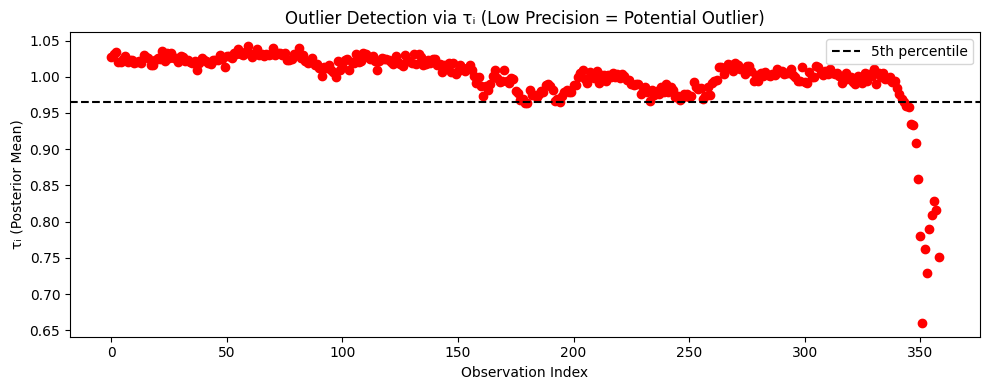

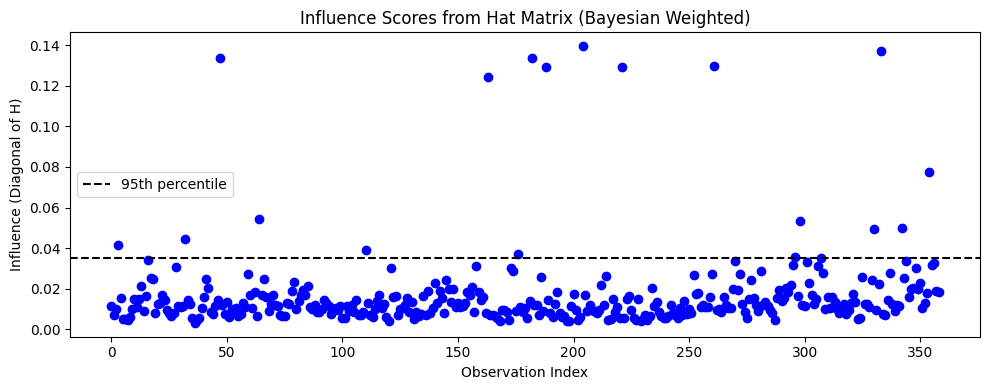

In [6]:
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as at
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv("climate_cocoa.csv", parse_dates=["Month"])
predictors = [
    "HotDays_Lag1", "RainyDays_Lag1", "AvgTemp_Lag1",
    "TotalRain_Lag1", "TempRange_Lag1"
]
target = "AvgPrice"

# Drop missing and standardize
df = df.dropna(subset=predictors + [target])
X = df[predictors].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])  # add intercept

n, p = X_scaled.shape

# Build Bayesian model
with pm.Model() as model:
    nu = pm.Gamma("nu", alpha=2.0, beta=0.1)
    tau = pm.Gamma("tau", alpha=2.0, beta=2.0)
    tau_i = pm.Gamma("tau_i", alpha=nu / 2, beta=nu / 2, shape=n)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=p)
    mu = at.dot(X_scaled, beta)
    y_obs = pm.Normal("y", mu=mu, sigma=at.sqrt(1 / (tau * tau_i)), observed=y)

    trace = pm.sample(1000, tune=500, chains=2, cores=1, target_accept=0.9, return_inferencedata=True)

# Posterior summaries
print(az.summary(trace, var_names=["beta", "nu", "tau"]))

# Outlier Detection
tau_i_mean = trace.posterior["tau_i"].mean(dim=["chain", "draw"]).values.flatten()

plt.figure(figsize=(10, 4))
plt.scatter(range(n), tau_i_mean, c="red")
plt.axhline(np.percentile(tau_i_mean, 5), linestyle="--", color="black", label="5th percentile")
plt.title("Outlier Detection via τᵢ (Low Precision = Potential Outlier)")
plt.xlabel("Observation Index")
plt.ylabel("τᵢ (Posterior Mean)")
plt.legend()
plt.tight_layout()
plt.show()

# Influence via Hat Matrix
D_sqrt = np.diag(np.sqrt(tau_i_mean))
X_D = D_sqrt @ X_scaled
H_diag = np.diag(X_D @ np.linalg.inv(X_D.T @ X_D) @ X_D.T)

plt.figure(figsize=(10, 4))
plt.scatter(range(n), H_diag, color="blue")
plt.axhline(np.percentile(H_diag, 95), linestyle="--", color="black", label="95th percentile")
plt.title("Influence Scores from Hat Matrix (Bayesian Weighted)")
plt.xlabel("Observation Index")
plt.ylabel("Influence (Diagonal of H)")
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation

- All beta coefficients have wide 94% credible intervals that include zero:
  - Example: `beta[1]` (3.36 ± 10.03), 94% CI: [−17.24, 20.28]
  - This suggests no strong evidence that individual climate variables reliably predict cocoa prices.
  
- The global precision parameter `tau` collapsed to near zero:
  - Posterior mean = 0.000, 94% CI: [0.000, 0.000]
  - Indicates that the model attributes nearly all variation to observation-specific noise (`tau_i`), consistent with outlier behavior.

- The parameter `nu`, controlling the Gamma prior’s tail thickness:
  - Posterior mean = 31.76, standard deviation = 14.31
  - Poor effective sample size: ESS = 17 (bulk), 91 (tail), and r_hat = 1.13
  - Suggests **instability and poor mixing**, meaning more draws or model tuning may be needed.

- All other parameters (`beta[0]` to `beta[5]`) had **good convergence**:
  - `r_hat ≈ 1.00` and ESS > 1000 for each coefficient

- In short, the model successfully accounts for **heteroskedasticity and potential outliers**, it is important to note that there is no clear, consistent relationship between the climate features and cocoa prices in this dataset.


Mabior Ater
$$
$$1004252925
$$
$$STA365 - HW7